# 시계열 분석

## By OPTIMUM
***

< 통계 기반 시계열 기법의 장점 >

- 모델의 파라미터 측면을 보면 명확하게 이해 가능
- 어느 정도 작은 데이터셋에 적용해도 여전히 좋은 결과
- 과적합이라는 위험성 없이도 좋은 성능 얻을 수 있다

< 통계 기반 시계열 기법의 단점 >

- 항상 성능 향상 보장하지 않는다. 대규모 데이터셋으로 작업한다면 ML DL 사용하는 것이 낫다.
- 분포보다 분포의 평균값 추정에 집중한다.
- 비선형 관계가 많은 데이터를 설명하는데 적합하지 않다.

### 시계열 분석과 기계학습의 차이
- 확률과정 : 상관 관계를 가지는 무한개 변수의 순서열
- 시계열 데이터 : 일정한 시간 간격으로 기록된 확률과정의 샘플

#### 기계학습과 시계열 예측간에 큰 차이가 존재하기 때문에 시계열 변수 생성은 조정이 요구됨
***
일반적인 시계열 분석 과정은 다음과 같습니다.

#### 과정
- 1. 시계열 Data인가 확인 -> 종속변수가 연속형이고 독립변수 중 시간 관련 변수가 있는지 확인
- 2. 있다면 index를 Date 타입에 맞게 변환(Day, Month, Hour 등등)
- 3. 단변량인지 다변량인지 문제를 확인한다. -> 다변량이라면 VAR, SARIMAX 등 사용
- 4. 데이터의 정상성을 확인한다. -> ADF, KPSS, ACF, PACF
- 5. 정상성을 확보했다면 모델링을 진행한다. -> ARIMA, SARIMA, LSTM, GRU, RNN 등
- 6. 변수에 변환을 하고 예측을 했다면 복원해서 예측값을 구한다.
- 7. 잔차 검정을 시행한다. -> 정규성, 등분산성, QQplot, autocorrelation_plot, plot_dianostics 등

## Package Import

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import rc
#rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
#from google.colab import drive
#drive.mount('/content/gdrive/', force_remount = True)

In [2]:
%cd /content/gdrive/My Drive/optimum/timeseries/

/content/gdrive/My Drive/optimum/timeseries


In [2]:
data = pd.read_csv('ETHUSDT-1h-data-original.csv')

In [3]:
data.head()

,timestamp,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av,ma9,ma26,change_price,ohlc/4,updown
0,2018-09-03 9:00,289.55,289.80,286.31,286.86,11630.11093,3343136.845,6260,5876.21622,1689315.860,290.272222,292.576154,-2.69,288.1300,-1
1,2018-09-03 10:00,286.91,287.65,285.99,287.38,8827.35845,2531254.623,4961,4178.38041,1198399.919,289.727778,292.171154,0.47,286.9825,1
2,2018-09-03 11:00,287.31,288.29,286.65,286.90,8182.48395,2351962.006,4791,4370.10789,1256081.643,289.037778,291.826923,-0.41,287.2875,-1
3,2018-09-03 12:00,286.90,289.27,286.36,288.49,13256.42630,3821600.569,5212,7376.84000,2127019.818,288.600000,291.622308,1.59,287.7550,1
4,2018-09-03 13:00,288.47,290.78,288.28,289.68,12459.64935,3612807.260,6020,6611.20044,1916764.497,288.773333,291.588461,1.21,289.3025,1


In [4]:
data.timestamp.max()

'2021-06-08 6:00'

In [5]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

data의 index로 사용할 timestamp 컬럼을 datetime type으로 변환합니다.

In [6]:
data.set_index('timestamp', inplace  = True)

data index를 datetime 형태로 설정합니다.

총 4개의 data를 구성합니다.
- 1. 2시간 간격
- 2. 4시간 간격
- 3. 하루 간격
- 4. 7일 간격

In [7]:
data1 = data.resample('2H').mean()
data2 = data.resample('4H').mean()
data3 = data.resample('D').mean()
data4 = data.resample('7D').mean()

각 데이터를 앞선 간격 범위로 평균 값을 내어 저장합니다. sum, min, var 등 다양한 통계함수 사용이 가능합니다.

In [8]:
data1 = data1.asfreq(freq = '2H', method = 'ffill').fillna(method = 'ffill')
data2 = data2.asfreq(freq = '4H', method = 'ffill').fillna(method = 'ffill')
data3 = data3.asfreq(freq = 'D', method = 'ffill').fillna(method = 'ffill')
data4 = data4.asfreq(freq = '7D', method = 'ffill').fillna(method = 'ffill')

data를 각 간격으로 할당하고 결측치의 경우 결측치 이전의 값으로 대치합니다.

In [9]:
print(f'data1의 행 수는 {data1.shape[0]}')
print(f'data2의 행 수는 {data2.shape[0]}')
print(f'data3의 행 수는 {data3.shape[0]}')
print(f'data4의 행 수는 {data4.shape[0]}')

data1의 행 수는 12108
data2의 행 수는 6054
data3의 행 수는 1010
data4의 행 수는 145


In [10]:
y_train1 = data1.close.iloc[:10000]
y_train2 = data2.close.iloc[:5500]
y_train3 = data3.close.iloc[:900]
y_train4 = data4.close.iloc[:115]

y_test1 = data1.close.iloc[10000:]
y_test2 = data2.close.iloc[5500:]
y_test3 = data3.close.iloc[900:]
y_test4 = data4.close.iloc[115:]

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

계절성, 트렌드 등을 확인하는 메서드입니다.

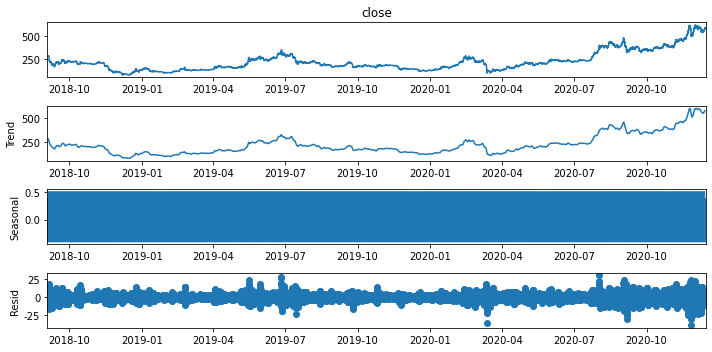

In [12]:
plt.rcParams['figure.figsize'] = (10, 5)
decomposed = seasonal_decompose(y_train1, model = 'additive')
decomposed.plot()
plt.show()

2시간 간격의 seasonal_decompose plot 결과 2시간 간격이기 때문에 계절성은 보이지 않습니다. 하지만 Trend plot에서 오르내림이 명확해 일종의 Trend는 존재함을 확인할 수 있습니다.

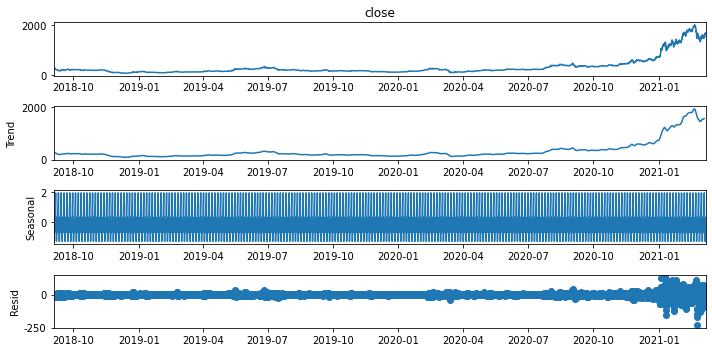

In [13]:
decomposed = seasonal_decompose(y_train2, model = 'additive')
decomposed.plot()
plt.show()

4시간 간격의 seasonal_decompose plot 결과 일종의 계절성은 보이지만 명확하지 않고 해석하기에 한계가 있습니다.. 하지만 Trend plot에서는 점차 상승하는 Trend를 발견할 수 있습니다.

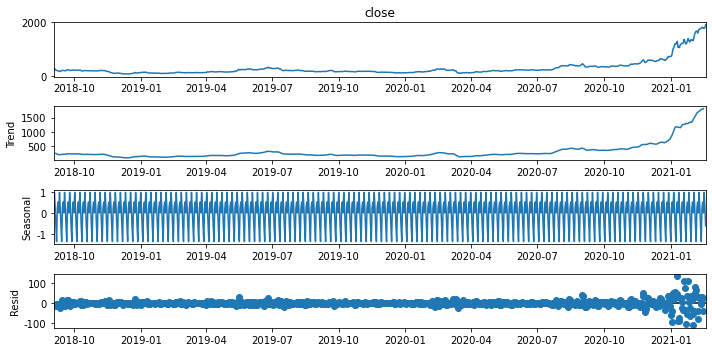

In [14]:
decomposed = seasonal_decompose(y_train3, model = 'additive')
decomposed.plot()
plt.show()

하루 간격의 seasonal_decompose plot 결과 이전 보다 명확한 계절성을 보이는 것으로 나타났습니다. 또한 4시간 간격과 마찬가지로 Trend에서 시간이 지날수록 상승하는 Trend가 존재하는 것을 알 수 있습니다.

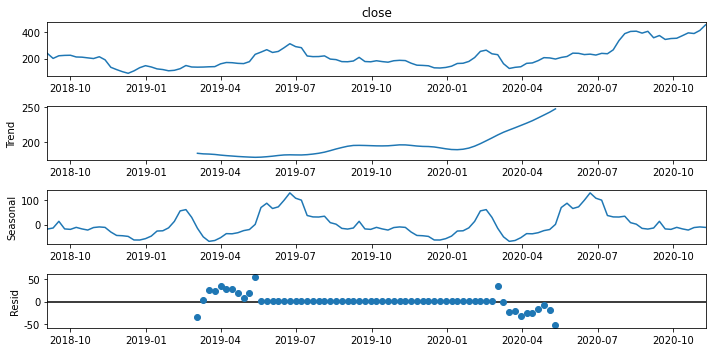

In [15]:
decomposed = seasonal_decompose(y_train4, model = 'additive')
decomposed.plot()
plt.show()

7일 간격으로 살펴본 결과 계절성이 더 눈에 띄는 것을 알 수 있습니다. 각 년도 4월부터 10월까지의 계절성이 명확해보입니다.

시계열 데이터에서 가장 중요한 것은 정상성으로 정상성(stationary) 여부를 확인해보겠습니다.

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

|확률과정| ACF | PACF |
|---|---|---|
|AR(p) | 지수적으로 감소하거나 소멸하는 싸인함수 형태 | 시차 p이후에는 0으로의 절단형태|
|MA(q)| 시차 q이후에는 0으로의 절단형태 | 지수적으로 감소하거나 소멸하는 싸인함수 형태|
|ARMA(p, q) | 시차(q-p) 이후에는 지수적으로 감소하거나 소멸하는 싸인함수 형태 | 시차(p-q) 이후에는 지수적으로 감소하거나 소멸하는 싸인함수 형태|



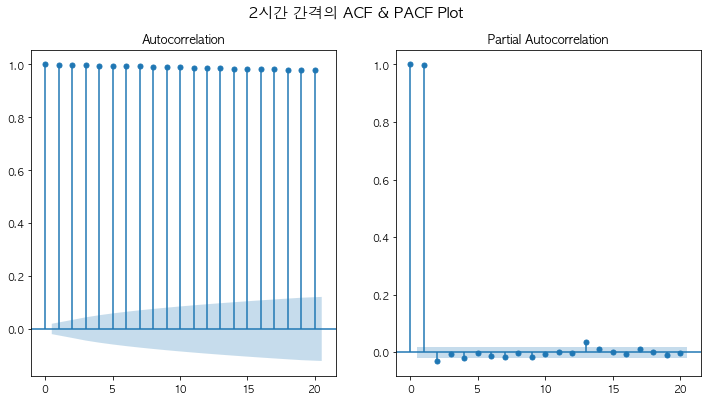

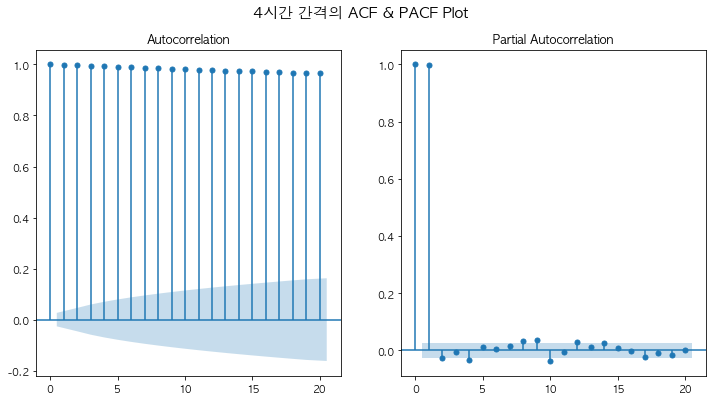

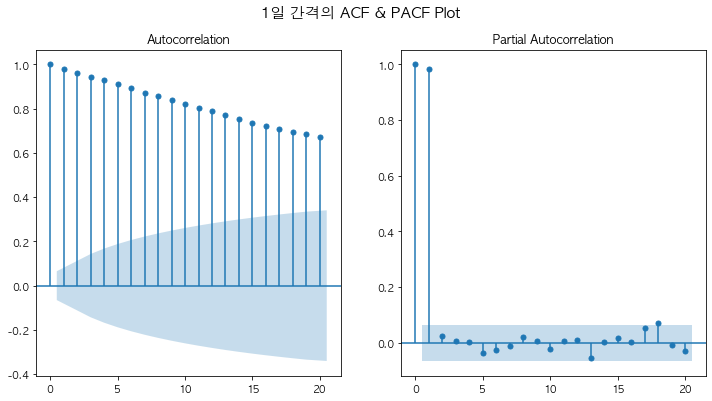

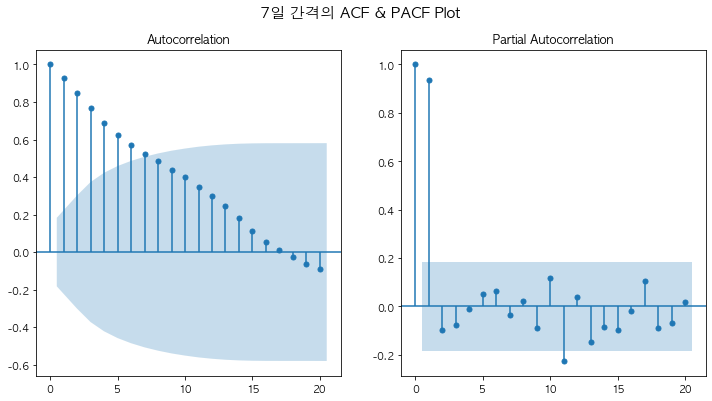

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
for v, i in enumerate(zip(np.arange(1, 5), ['2시간', '4시간', '1일', '7일'])) :
    fig, ax = plt.subplots(1, 2, figsize = (12, 6))
    plot_acf(globals()[f'y_train{i[0]}'], lags = 20, ax = ax[0])
    plot_pacf(globals()[f'y_train{i[0]}'], lags = 20, ax = ax[1])
    plt.suptitle(f'{i[1]} 간격의 ACF & PACF Plot', size = 15)
    plt.show()

일반적으로 AR(p) 파라미터는 PACF로, MA(q) 파라미터는 ACF로 결정할 수 있는데 시각화로만 이 파라미터를 결정하기 어려운 경우도 많습니다. 특정 lag 지점에서 높은 Correlation을 보이면 차분을 하는 것이 무난할 것으로 보이지만 충분히 만족할만한 설명은 아닙다. 따라서 통계적 검정으로 해당 데이터가 정상성을 만족하는지 평가합니다. 대표적인 통계적 검정 방법은 아래 두 가지가 있습니다.

- KPSS 검정
- ADF 검정

먼저 KPSS 검정을 진행해 보겠습니다.

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
def get_kpss(x) :
    s, p, _, _ = kpss(x)
    print('Before Diff')
    print(f"KPSS Statistic : {s}")
    print(f"P-value : {p}\n")
    
    s_diff, p_diff, _, _ = kpss(x.diff().dropna())
    print('After Diff')
    print(f"KPSS Statistic : {s_diff}")
    print(f"P-value : {p_diff}\n")
    
    print("KPSS 검정 결과")
    if (p_diff < 0.05) & (p_diff < p) :
        print("차분을 한 후 분석을 진행합니다.")
    else :
        print("차분을 하지 않고 분석을 진행합니다.")

In [ ]:
get_kpss(y_train1)

Before Diff
KPSS Statistic : 11.371857473745164
P-value : 0.01

After Diff
KPSS Statistic : 0.463788190916852
P-value : 0.049822479523231544

KPSS 검정 결과
차분을 하지 않고 분석을 진행합니다.


In [ ]:
get_kpss(y_train2)

Before Diff
KPSS Statistic : 6.534674820343823
P-value : 0.01

After Diff
KPSS Statistic : 0.850585515403323
P-value : 0.01

KPSS 검정 결과
차분을 하지 않고 분석을 진행합니다.


In [ ]:
get_kpss(y_train3)

Before Diff
KPSS Statistic : 1.737172970452973
P-value : 0.01

After Diff
KPSS Statistic : 1.1585558415995374
P-value : 0.01

KPSS 검정 결과
차분을 하지 않고 분석을 진행합니다.


In [ ]:
get_kpss(y_train4)

Before Diff
KPSS Statistic : 0.47031039305750555
P-value : 0.0483535150771384

After Diff
KPSS Statistic : 0.35802185028478095
P-value : 0.09524920246345649

KPSS 검정 결과
차분을 하지 않고 분석을 진행합니다.


모든 데이터가 차분을 하지 않고도 정상성을 만족합니다!

ADF 검정으로 정상성을 확인해보도록 하겠습니다.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def get_adf(x) :
    

    s, p, _, _, _ = adfuller(x, autolag = None)
    print(f"원 데이터의 ADF 값 : {s}")
    print(f'원 데이터의 P-value : {p}\n')

    s_diff, p_diff, _, _, _ = adfuller(x.diff().dropna(), autolag = None)
    print(f"1차 차분 데이터의 ADF 값 : {s_diff}")
    print(f'1차 차분 데이터의 P-value : {p_diff}')
    
    print("\nADF 검정 결과")
    if (p_diff < 0.05) & (p_diff < p) :
        print("차분을 한 후 분석을 진행합니다.")
    else :
        print("차분을 하지 않고 분석을 진행합니다.")

In [ ]:
get_adf(y_train1)

원 데이터의 ADF 값 : 0.2837081003291448
원 데이터의 P-value : 0.976584552201762

1차 차분 데이터의 ADF 값 : -15.67839166250191
1차 차분 데이터의 P-value : 1.4830917304708892e-28

ADF 검정 결과
차분을 한 후 분석을 진행합니다.


In [ ]:
get_adf(y_train2)

원 데이터의 ADF 값 : 2.320754193949773
원 데이터의 P-value : 0.9989679923933162

1차 차분 데이터의 ADF 값 : -11.899066091089177
1차 차분 데이터의 P-value : 5.63118137752058e-22

ADF 검정 결과
차분을 한 후 분석을 진행합니다.


In [ ]:
get_adf(y_train3)

원 데이터의 ADF 값 : 4.896732401851333
원 데이터의 P-value : 1.0

1차 차분 데이터의 ADF 값 : -3.0937787869271514
1차 차분 데이터의 P-value : 0.02701702491798162

ADF 검정 결과
차분을 한 후 분석을 진행합니다.


In [ ]:
get_adf(y_train4)

원 데이터의 ADF 값 : -0.036299448592702024
원 데이터의 P-value : 0.9554252020205017

1차 차분 데이터의 ADF 값 : -2.7795860568505337
1차 차분 데이터의 P-value : 0.061249439672787856

ADF 검정 결과
차분을 하지 않고 분석을 진행합니다.


KPSS와 ADF는 주의할 점이 있습니다. 바로 위와 같이 결과가 상충하는 것인데요.

두 검정 결과가 서로 같으면 아무 문제가 되지 않지만 서로 다른 결과를 주장할 경우가 있습니다.

이 때는 두 가지 접근법이 있으며

1. KPSS = stationary but ADF = not stationary인 경우 trend를 제거해 주어야 합니다.

2. KPSS = not stationary but ADF = stationary인 경우는 차분이 필요한 경우입니다.

정리하면 아래 표와 같습니다.

|Data | 차분 이전 KPSS | 차분 이전 ADF|차분 이후 KPSS| 차분 이후 ADF|KPSS vs ADF|
|---|---|---|---|---|---|
|y_train1|정상성 만족|정상성 불만족|정상성 만족|정상성 만족|차분 필요|
|y_train2|정상성 만족|정상성 불만족|정상성 만족|정상성 만족|차분 필요|
|y_train3|정상성 만족|정상성 불만족|정상성 만족|정상성 만족|차분 필요|
|y_train4|정상성 만족|정상성 불만족|정상성 불만족|정상성 불만족|트렌드 제거 필요|

이제 실제로 모델링을 진행해 보도록 하겠습니다. 우선 간단한 ARIMA 모형을 사용해보겠습니다.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

AIC를 기준으로 AIC가 최소가 되는 모형을 탐색하는 커스텀 함수입니다.

In [ ]:
def my_auto_arima(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order = (p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p{p} d{d} q{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)), columns = ['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [ ]:
auto_df = my_auto_arima(y_train1, [3,2,3])
auto_df.sort_values(by = 'AIC').head(1)

,order,AIC
12,p2 d1 q2,48470.037799


ARIMA p, d, q 파라미터 탐색 결과 각각 2, 1, 2 일때 AIC가 가장 낮은 것으로 나타났습니다.

In [ ]:
order = (2, 1, 2)
model = ARIMA(y_train1, order)
arima = model.fit()
arima.summary() # AIC가 작을수록 좋음

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 9999
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -24229.019
Method:                       css-mle   S.D. of innovations              2.730
Date:                Fri, 11 Jun 2021   AIC                          48470.038
Time:                        13:30:38   BIC                          48513.299
Sample:                    09-03-2018   HQIC                         48484.682
                         - 12-14-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0297      0.031      0.964      0.335      -0.031       0.090
ar.L1.D.close    -0.5932      0.179     -3.312      0.001      -0.944      -0.242
ar.L2.D.close     0.3680      0.170      2.160      0.031       0.034       0.702
ma.L1.D.close     0.6780      0.184      3.677      0.000       0.317       1.039
ma.L2.D.close    -0.2972      0.179     -1.664      0.096      -0.647       0.053
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0290           +0.0000j            1.0290            0.5000
AR.2            2.6408           +0.0000j            2.6408            0.0000
MA.1           -1.0194           +0.0000j            1.0194            0.5000
MA.2            3.3003           +0.0000j            3.3003            0.0000
-----------------------------------------------------------------------------
"""

실제 파라미터를 설정한 ARIMA 모형으로 데이터를 학습합니다.

In [ ]:
pred = arima.predict(start = y_test1.index[0], end = y_test1.index[-1], typ = 'levels')

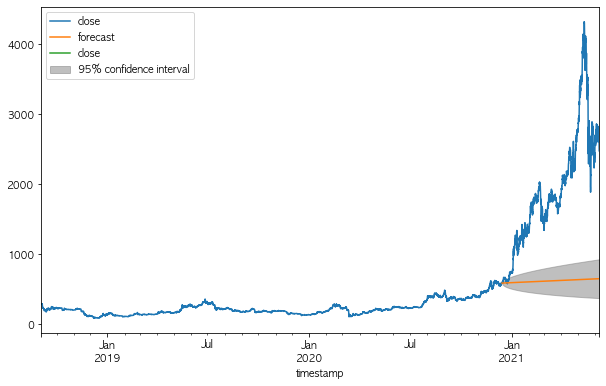

In [ ]:
ax = data1.close.plot()
arima.plot_predict(start = y_test1.index[0], end = y_test1.index[-1], ax = ax)
plt.show()

해당 모형으로 예측을 한 후 실제 값과 plot으로 비교를 해봅니다.

예측 성능이 현저히 낮은 것으로 보입니다. 실제로 RMSE로 성능을 평가해보겠습니다.

In [26]:
from sklearn.metrics import mean_squared_error

In [ ]:
print(f'ARIMA 모형의 RMSE = {np.sqrt(mean_squared_error(y_test1, pred))}')

ARIMA 모형의 RMSE = 1517.693085057453


실제 데이터 값이 5000 미만의 값인 점을 고려하면 RMSE가 1517이나 되는 것이 성능이 상당히 좋지 않음을 의미합니다.

다른 시간 간격의 데이터도 성능을 확인해보겠습니다.

In [ ]:
auto_df = my_auto_arima(y_train2, [3,2,3])
auto_df.sort_values(by = 'AIC').head(1)

,order,AIC
12,p2 d1 q2,39977.14662


ARIMA p, d, q 파라미터 탐색 결과 각각 2, 1, 2 일때 AIC가 가장 낮은 것으로 나타났습니다.

In [ ]:
order = (2, 1, 2)
model = ARIMA(y_train2, order)
arima = model.fit()
arima.summary() # AIC가 작을수록 좋음

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 5499
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -19982.573
Method:                       css-mle   S.D. of innovations              9.161
Date:                Fri, 11 Jun 2021   AIC                          39977.147
Time:                        13:30:52   BIC                          40016.821
Sample:                    09-03-2018   HQIC                         39990.985
                         - 03-07-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2540      0.158      1.612      0.107      -0.055       0.563
ar.L1.D.close    -0.3735      0.091     -4.110      0.000      -0.552      -0.195
ar.L2.D.close     0.4567      0.058      7.910      0.000       0.344       0.570
ma.L1.D.close     0.5419      0.092      5.905      0.000       0.362       0.722
ma.L2.D.close    -0.3725      0.067     -5.525      0.000      -0.505      -0.240
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1263           +0.0000j            1.1263            0.5000
AR.2            1.9441           +0.0000j            1.9441            0.0000
MA.1           -1.0653           +0.0000j            1.0653            0.5000
MA.2            2.5198           +0.0000j            2.5198            0.0000
-----------------------------------------------------------------------------
"""

실제 파라미터를 설정한 ARIMA 모형으로 데이터를 학습합니다.

In [ ]:
pred = arima.predict(start = y_test2.index[0], end = y_test2.index[-1], typ = 'levels')

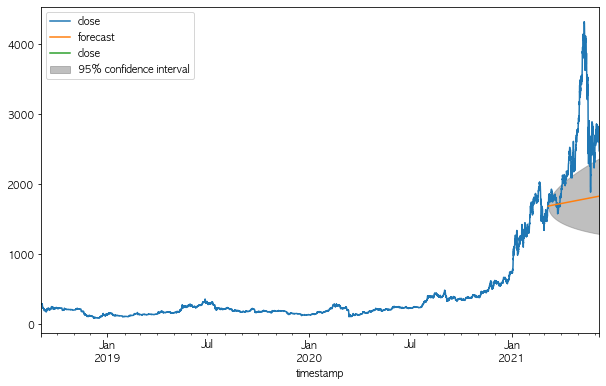

In [ ]:
ax = data1.close.plot()
arima.plot_predict(start = y_test2.index[0], end = y_test2.index[-1], ax = ax)
plt.show()

In [ ]:
print(f'ARIMA 모형의 RMSE = {np.sqrt(mean_squared_error(y_test2, pred))}')

ARIMA 모형의 RMSE = 959.0161516243314


In [ ]:
auto_df = my_auto_arima(y_train2, [3,2,3])
auto_df.sort_values(by = 'AIC').head(1)

,order,AIC
12,p2 d1 q2,39977.14662


ARIMA p, d, q 파라미터 탐색 결과 각각 2, 1, 2 일때 AIC가 가장 낮은 것으로 나타났습니다.

In [ ]:
order = (2, 1, 2)
model = ARIMA(y_train2, order)
arima = model.fit()
arima.summary() # AIC가 작을수록 좋음

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 5499
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -19982.573
Method:                       css-mle   S.D. of innovations              9.161
Date:                Fri, 11 Jun 2021   AIC                          39977.147
Time:                        13:31:05   BIC                          40016.821
Sample:                    09-03-2018   HQIC                         39990.985
                         - 03-07-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2540      0.158      1.612      0.107      -0.055       0.563
ar.L1.D.close    -0.3735      0.091     -4.110      0.000      -0.552      -0.195
ar.L2.D.close     0.4567      0.058      7.910      0.000       0.344       0.570
ma.L1.D.close     0.5419      0.092      5.905      0.000       0.362       0.722
ma.L2.D.close    -0.3725      0.067     -5.525      0.000      -0.505      -0.240
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1263           +0.0000j            1.1263            0.5000
AR.2            1.9441           +0.0000j            1.9441            0.0000
MA.1           -1.0653           +0.0000j            1.0653            0.5000
MA.2            2.5198           +0.0000j            2.5198            0.0000
-----------------------------------------------------------------------------
"""

실제 파라미터를 설정한 ARIMA 모형으로 데이터를 학습합니다.

In [ ]:
pred = arima.predict(start = y_test2.index[0], end = y_test2.index[-1], typ = 'levels')

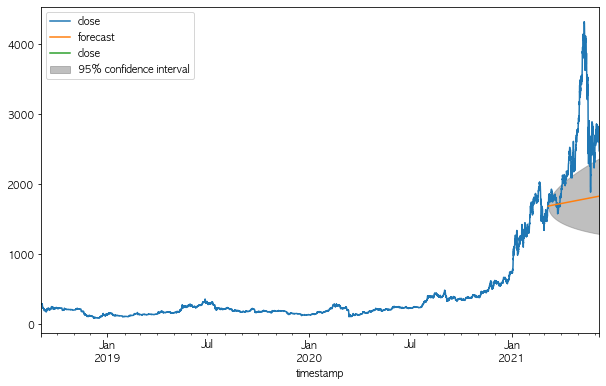

In [ ]:
ax = data1.close.plot()
arima.plot_predict(start = y_test2.index[0], end = y_test2.index[-1], ax = ax)
plt.show()

In [ ]:
print(f'ARIMA 모형의 RMSE = {np.sqrt(mean_squared_error(y_test2, pred))}')

ARIMA 모형의 RMSE = 959.0161516243314


In [ ]:
auto_df = my_auto_arima(y_train3, [3,2,3])
auto_df.sort_values(by = 'AIC').head(1)

,order,AIC
13,p2 d1 q2,7743.743051


ARIMA p, d, q 파라미터 탐색 결과 각각 2, 1, 2 일때 AIC가 가장 낮은 것으로 나타났습니다.

In [ ]:
order = (2, 1, 2)
model = ARIMA(y_train3, order)
arima = model.fit()
arima.summary() # AIC가 작을수록 좋음

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                  899
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3865.872
Method:                       css-mle   S.D. of innovations             17.829
Date:                Fri, 11 Jun 2021   AIC                           7743.743
Time:                        13:31:08   BIC                           7772.551
Sample:                    09-04-2018   HQIC                          7754.748
                         - 02-18-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8101      0.648      2.793      0.005       0.540       3.080
ar.L1.D.close     0.5305      0.033     15.885      0.000       0.465       0.596
ar.L2.D.close    -0.8961      0.029    -30.508      0.000      -0.954      -0.839
ma.L1.D.close    -0.3531      0.045     -7.814      0.000      -0.442      -0.265
ma.L2.D.close     0.8410      0.027     30.834      0.000       0.788       0.895
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2960           -1.0141j            1.0564           -0.2048
AR.2            0.2960           +1.0141j            1.0564            0.2048
MA.1            0.2099           -1.0700j            1.0904           -0.2192
MA.2            0.2099           +1.0700j            1.0904            0.2192
-----------------------------------------------------------------------------
"""

실제 파라미터를 설정한 ARIMA 모형으로 데이터를 학습합니다.

In [ ]:
pred = arima.predict(start = y_test3.index[0], end = y_test3.index[-1], typ = 'levels')

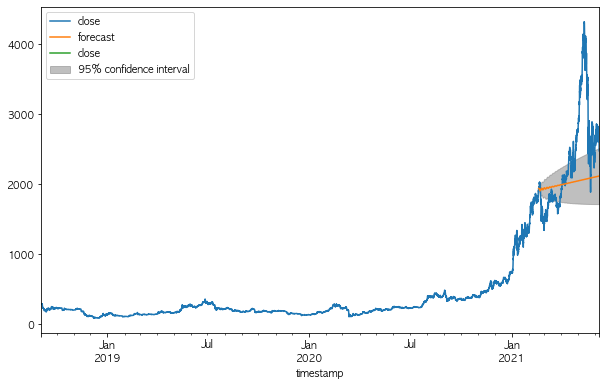

In [ ]:
ax = data1.close.plot()
arima.plot_predict(start = y_test3.index[0], end = y_test3.index[-1], ax = ax)
plt.show()

In [ ]:
print(f'ARIMA 모형의 RMSE = {np.sqrt(mean_squared_error(y_test3, pred))}')

ARIMA 모형의 RMSE = 719.0604565377816


In [ ]:
auto_df = my_auto_arima(y_train4, [3,2,3])
auto_df.sort_values(by = 'AIC').head(1)

,order,AIC
15,p2 d1 q1,1019.341491


ARIMA p, d, q 파라미터 탐색 결과 각각 2, 1, 2 일때 AIC가 가장 낮은 것으로 나타났습니다.

In [ ]:
order = (2, 1, 1)
model = ARIMA(y_train4, order)
arima = model.fit()
arima.summary() # AIC가 작을수록 좋음

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                  114
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -504.671
Method:                       css-mle   S.D. of innovations             20.049
Date:                Fri, 11 Jun 2021   AIC                           1019.341
Time:                        13:31:09   BIC                           1033.022
Sample:                    09-10-2018   HQIC                          1024.894
                         - 11-09-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.9177      2.917      0.657      0.511      -3.800       7.635
ar.L1.D.close    -0.6402        nan        nan        nan         nan         nan
ar.L2.D.close     0.3598   2.22e-05   1.62e+04      0.000       0.360       0.360
ma.L1.D.close     0.9989        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0000           +0.0000j            1.0000            0.5000
AR.2            2.7792           +0.0000j            2.7792            0.0000
MA.1           -1.0011           +0.0000j            1.0011            0.5000
-----------------------------------------------------------------------------
"""

실제 파라미터를 설정한 ARIMA 모형으로 데이터를 학습합니다.

In [ ]:
pred = arima.predict(start = y_test4.index[0], end = y_test4.index[-1], typ = 'levels')

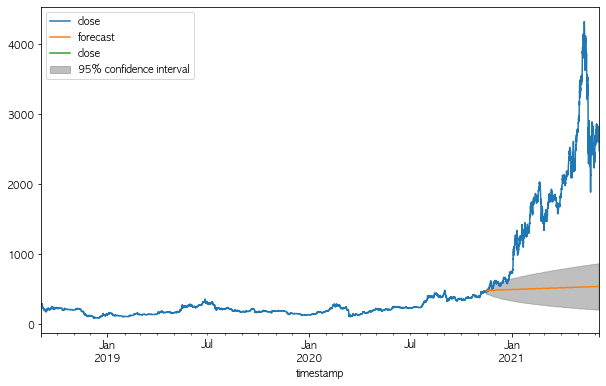

In [ ]:
ax = data1.close.plot()
arima.plot_predict(start = y_test4.index[0], end = y_test4.index[-1], ax = ax)
plt.show()

In [ ]:
print(f'ARIMA 모형의 RMSE = {np.sqrt(mean_squared_error(y_test4, pred))}')

ARIMA 모형의 RMSE = 1508.7866312590336


## SARIMAX


#### Seasonal ARIMA 모형은 각 계절에 따른 독립적인 ARIMA 모형이 합쳐져 있는 모형이다.
#### X는 외부변수를 나타내는 eXogeneous의 줄임말로 자기 자신 뿐만 아니라 외부 변수까지 학습과 예측에 포함할 수 있다는 의미이다.
#### 기존 ARIMA(p, d, q) 모형에 계절성 주기를 나타내는 차수 s가 추가적으로 필요하여 SARIMA(P, D, Q, s)로 표기한다.
- s의 값은 월별 계절성의 경우 12 분기별 계정성은 4가 된다.
- 예를 들어 각 월의 시계열 자료 값이 현재의 백색 잡음 이외에 작년 동월의 백색잡음에 영향을 받는 다면 다음과 같은 단순 SARIMA(0,0,1,12)가 된다.

|파라미터 | 설명|
|---|---|
|p| order of non-seasonal AR temrs|
|d|order of non-seasonal differencing|
|q| order of non-seasonal MA terms|
|P| order of seasonal AR terms|
|D| order of seasonal differencing|
|Q|order of seasonal MA terms|
|S| length of the cycle|

#### <center><메서드 주요 파라미터><center>
| 파라미터 | 설명 |
|---|---|
|endog | 관측된 시계열 데이터|
| exog | 관측된 시계열에 영향을 미치는 외부 변수 데이터|
| order | ARIMA의 (p, d, q)|
|seasonal_order | SARIMA의 seasonal component인 (P,D,Q,s)|
|enforce_stationay | AR항이 stationary를 만족하게끔 강제하는 것으로 디폴트는 True|
|enforce_invertibility| MA항이 stationary를 만족하게끔 강제하는 것으로 디폴트는 True|

In [16]:
from itertools import product, combinations
from tqdm import tqdm
from statsmodels.tsa.api import SARIMAX

In [17]:
p, q = range(1,3), range(1,3)
d = range(0, 2)

기존 ARIMA의 파라미터인 p, d, q 값의 범위를 설정합니다.

In [18]:
P, Q = range(1,3), range(1,3)
D = range(0, 2)
S = 7

SARIMAX의 추가된 파라미터인 P, D, Q, S의 범위를 설정합니다.

7일 주기로 계절성이 나타난다고 판단하여 임의로 7을 설정했습니다.

In [19]:
trend_pdq = list(product(p, d, q))
seasonal_pdq = [(candi[0], candi[1], candi[2], S) for candi in list(product(P, D, Q))]
## SARIMAX
AIC = []
SARIMAX_order = []
for trend_param in tqdm(trend_pdq):
    for seasonal_params in seasonal_pdq:
        try:
            result = SARIMAX(y_train3, trend = 'c', 
                                   order = trend_param, seasonal_order = seasonal_params, exog = data3[['open', 'volume', 'trades', 'ma9', 'ohlc/4']].iloc[:900]).fit()
            AIC.append(result.aic)
            SARIMAX_order.append([trend_param, seasonal_params])
        except:
            continue
## Parameter Selection
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_order[AIC.index(min(AIC))][0], SARIMAX_order[AIC.index(min(AIC))][1]))

  0%|          | 0/8 [00:00<?, ?it/s]/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Us

/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 62%|██████▎   | 5/8 [02:06<01:13, 24.59s/it]/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed 

The smallest AIC is 140.36693411545724 for model SARIMAX(1, 0, 1)x(2, 0, 1, 7)


In [21]:
model = SARIMAX(y_train3, trend = 'c', order = SARIMAX_order[AIC.index(min(AIC))][0], 
                                seasonal_order = SARIMAX_order[AIC.index(min(AIC))][1], exog = data3[['open', 'volume', 'trades', 'ma9', 'ohlc/4']].iloc[:900]).fit()
display(model.summary())

/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             close   No. Observations:                  900
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 7)   Log Likelihood                 -58.183
Date:                           Sat, 12 Jun 2021   AIC                            140.367
Time:                                   19:37:12   BIC                            197.996
Sample:                               09-03-2018   HQIC                           162.382
                                    - 02-18-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0131      0.046     -0.285      0.775      -0.103       0.077
open          -0.2759      0.015    -18.436      0.000      -0.305      -0.247
volume      -6.93e-06   8.27e-07     -8.378      0.000   -8.55e-06   -5.31e-06
trades       3.02e-05   1.41e-06     21.413      0.000    2.74e-05     3.3e-05
ma9           -0.0574      0.002    -23.820      0.000      -0.062      -0.053
ohlc/4         1.3331      0.013    104.813      0.000       1.308       1.358
ar.L1         -0.2688      0.068     -3.981      0.000      -0.401      -0.136
ma.L1          0.0292      0.068      0.431      0.667      -0.104       0.162
ar.S.L7       -0.2374      0.144     -1.650      0.099      -0.519       0.045
ar.S.L14      -0.1264      0.026     -4.840      0.000      -0.178      -0.075
ma.S.L7        0.0729      0.148      0.494      0.621      -0.216       0.362
sigma2         0.0689      0.001     67.624      0.000       0.067       0.071
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):             89633.54
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):              20.17   Skew:                            -1.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        51.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
pred = model.get_forecast(len(y_test3), exog = data3[['open', 'volume', 'trades', 'ma9', 'ohlc/4']].iloc[900:]).predicted_mean

In [27]:
print(np.sqrt(mean_squared_error(y_test3, pred)))

1.4000183802410877


기존 ARIMA 보다 RMSE가 아주아주 성능이 좋아진 것을 알 수 있습니다. 확실히 계절성의 여부가 주요했던 것 같습니다.

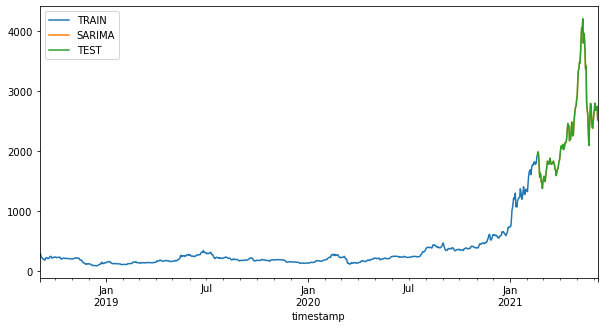

In [144]:
plt.figure(figsize = (10, 5))
ax = y_train3.plot(label = 'TRAIN')
pred.plot(label = 'SARIMA')
y_test3.plot(label = 'TEST')
plt.legend()
plt.show()

## GRU & LSTM

- 시퀀스형 딥러닝 계열에는 GRU, LSTM, RNN이 있습니다.

In [120]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model,Sequential
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import LSTM,Dense,Dropout,GRU
from keras.optimizers import Adam
from keras.

In [121]:
#close 값 변수 지정 (float타입 변경)
cl = data3['close'].astype('float32')

#전체 데이터의 80% train 변수 지정
train = cl[:int(len(cl)*0.8)]

# look-back을 7을 사용하기 때문에 8을 더 빼주어야 실제 예측값을 도출할 데이터부터 예측값을 반환해준다.
test = cl[int(len(cl)*0.8)-8:]

# 실제 우리가 검증할 남은 20%의 데이터
real_test = cl[int(len(cl) * .8):]

#변수 스케일링을 위한 MinMaxScaler 선언 (전체 데이터가 0~1 값을 가지게 됨)
scl = MinMaxScaler()
cl = scl.fit_transform(train.values.reshape(-1, 1))
test = scl.transform(test.values.reshape(-1, 1))
#데이터 전처리
def process_data(data,lb = 7):
    X,Y = [],[]
    for i in tqdm(range(len(data)-lb-1)):
        X.append(data[i:(i+lb)])
        Y.append(data[(i+lb)])
    return np.array(X),np.array(Y)
 
 
lb = 7 #look back 단위를 7로 지정 (수정 가능)

#전체 데이터의 90%를 train, 10%를 테스트 데이터로 지정함. (수정 가능)
X,y = process_data(cl,lb)
X_train,X_test = X[:int(X.shape[0]*0.9)],X[int(X.shape[0]*0.9):]
y_train,y_test = y[:int(y.shape[0]*0.9)],y[int(y.shape[0]*0.9):]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

100%|██████████| 800/800 [00:00<00:00, 202513.32it/s]

(720, 7, 1)
(80, 7, 1)
(720, 1)
(80, 1)


In [122]:
#모델 레이어 구성

#val_loss가 3회 이상 증가할 때 학습을 조기 종료 시킴
es = EarlyStopping(monitor = 'val_loss', mode='min', verbose = 1, patience = 2)

# 성능이 가장 좋을 때의 모델 저장
mc = ModelCheckpoint('optimum_GRU.h5', save_best_only = True, verbose = 1, monitor = 'val_mae', mode = 'min')


model = Sequential()
model.add(GRU(64,input_shape=(lb, 1)))
model.add(Dropout(.2))
model.add(Dense(1))
model.compile(optimizer = Adam(lr = .003), loss='mae', metrics=['mae']) #rnn 계열의 알고리즘은 rmsprop의 optimizer를 사용할 때 주로 사용됨
 
#데이터를 input 값에 적합한 형태로 reshape 진행 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
 
#모델 학습
history = model.fit(X_train, y_train, epochs = 20,validation_data=(X_test,y_test), callbacks = [mc, es])

Epoch 1/20
23/23 [==============================] - 4s 33ms/step - loss: 0.1063 - mae: 0.1063 - val_loss: 0.0558 - val_mae: 0.0558

Epoch 00001: val_mae improved from inf to 0.05585, saving model to optimum_LSTM.h5
Epoch 2/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0344 - mae: 0.0344 - val_loss: 0.0477 - val_mae: 0.0477

Epoch 00002: val_mae improved from 0.05585 to 0.04774, saving model to optimum_LSTM.h5
Epoch 3/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0268 - mae: 0.0268 - val_loss: 0.0321 - val_mae: 0.0321

Epoch 00003: val_mae improved from 0.04774 to 0.03205, saving model to optimum_LSTM.h5
Epoch 4/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0253 - mae: 0.0253 - val_loss: 0.0302 - val_mae: 0.0302

Epoch 00004: val_mae improved from 0.03205 to 0.03019, saving model to optimum_LSTM.h5
Epoch 5/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0256 - mae: 0.0256 - val_loss: 0.0298 - val_mae: 0.0298



In [139]:
model = load_model('optimum_GRU.h5')

Text(0.5, 1.0, 'Train')

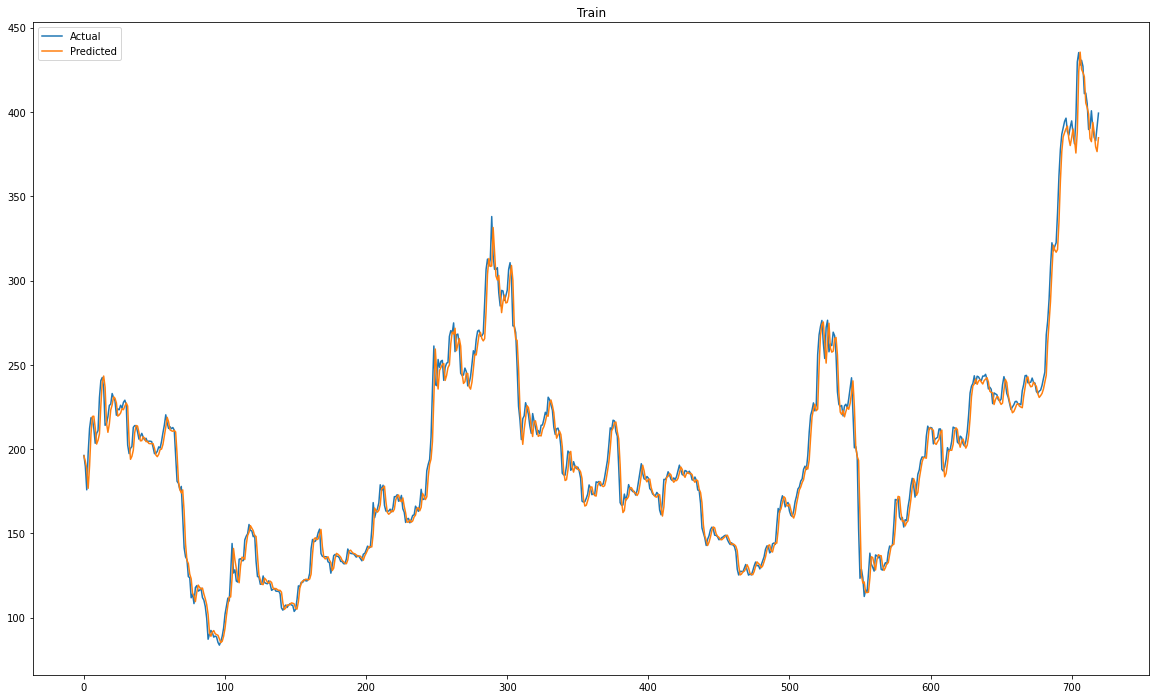

In [123]:
plt.figure(figsize=(20,12))
Xt = model.predict(X_train)
plt.plot(scl.inverse_transform(y_train.reshape(-1, 1)), label="Actual")
plt.plot(scl.inverse_transform(Xt.reshape(-1, 1)), label = "Predicted")
plt.legend()
plt.title("Train")

In [124]:
target, actual = process_data(test, 7)

100%|██████████| 202/202 [00:00<00:00, 122985.83it/s]


In [125]:
input_test = target.reshape((target.shape[0],target.shape[1],1))

In [126]:
pred = model.predict(input_test)
pred = scl.inverse_transform(pred)

In [127]:
pred = pd.Series([x[0] for x in pred], index = real_test.index)

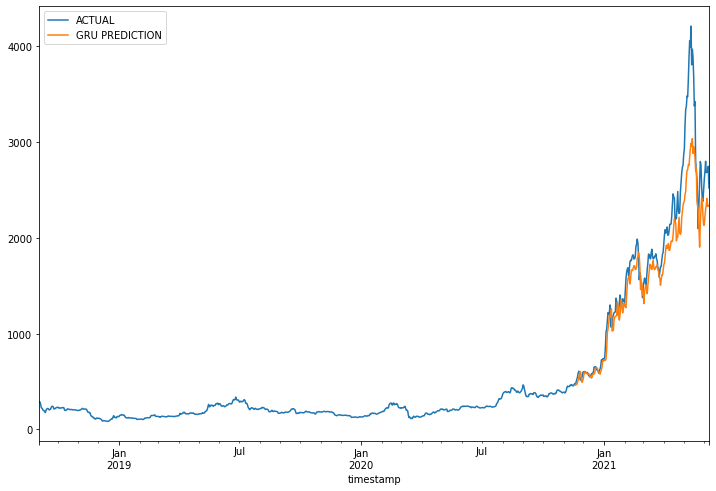

In [134]:
plt.figure(figsize = (12, 8))
ax = data3.close.plot(label = 'ACTUAL')
pred.plot(label = 'GRU PREDICTION')
plt.legend()
plt.show()

## VAR & VARMAX

- 여러 시계열 변수로 구성되며 예측에 매우 유용한 도구
- 자동 회귀(AR) 모형의 확장 버전

In [97]:
from statsmodels.tsa.api import VARMAX, VAR

In [46]:
data = data3[['open', 'close', 'volume', 'trades', 'ma9', 'ohlc/4']]

In [96]:
data.head()

,open,close,volume,trades,ma9,ohlc/4
timestamp,,,,,,
2018-09-03,289.250667,289.222000,12708.858988,5173.133333,289.227185,289.227667
2018-09-04,287.641250,287.490000,13754.257917,5372.333333,288.235602,287.496458
2018-09-05,265.532083,263.158333,22030.596650,9093.458333,270.728704,264.126146
2018-09-06,226.494583,226.564583,23041.536070,10048.583333,228.920833,226.305208
2018-09-07,222.839583,222.212500,16599.159059,6767.916667,223.794074,222.513229


In [60]:
train = data.iloc[:980]
test = data.iloc[980:]

In [70]:
forecasting_model = VARMAX(train[['close', 'open']], exog = train.drop(['close','open'], axis = 1), freq = 'D')

close, open 을 예측하는 모델을 생성합니다.

exog는 외부 변수 즉 다른 독립변수를 의미합니다.

In [72]:
results = forecasting_model.fit()

In [78]:
pred = results.forecast(steps = 30, exog = test.drop(['close','open'], axis = 1))

향후 한달간의 예측치를 출력합니다.

In [81]:
pred['actual_close'] = test.close

In [114]:
print(f'VARMAX의 RMSE는 {np.sqrt(mean_squared_error(test.close, pred.close))}')

VARMAX의 RMSE는 19.730629750369754


GRU를 사용했을 때 보다 더 성능이 좋은 것을 알 수 있습니다.

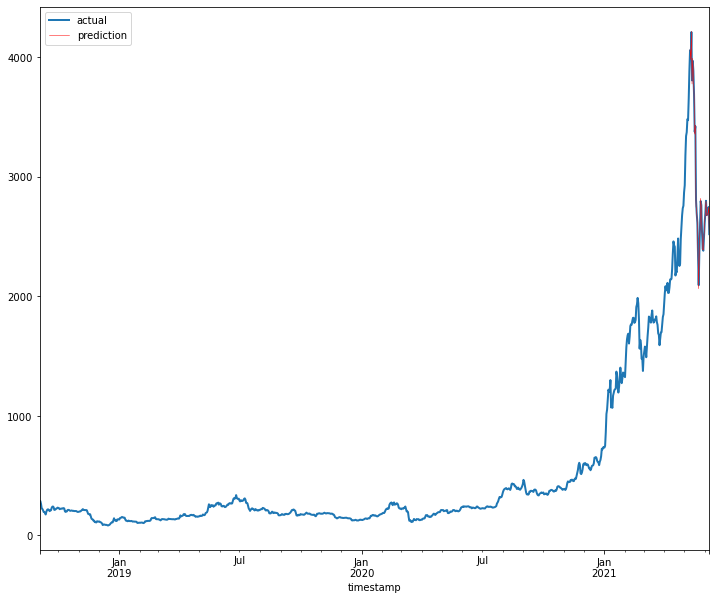

In [115]:
plt.figure(figsize = (12, 10))
ax = data.close.plot(linewidth = 2, label = 'actual')
pred.close.plot(linewidth = .5, color = 'r', label = 'prediction')
plt.legend()
plt.show()